# Confirm model for deltaT

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import random
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.interpolate as interpolate

## Physical Parameters

In [2]:
# mach number Ma
Ma = 0.025 ** (1/2)
K = 1
eta = 1

## Functions of Ma

In [3]:
meandeltaT = 2*np.pi

# variables for generating F1
stdF1 = eta * Ma**2 / (2 * np.pi)
limitY1 = eta / (2 * np.pi)

# variables for generating F2 and G1
stdF2 = eta * Ma**2
limitY2 = eta 


## Calculation parameters

In [4]:
L = 1
M = 10**3
M_short = 200
N = 1
m = 10**2

# dTau is the time step for the Runge Kutta Method
def fundTau(J): 
    dTau= 2 * np.pi / J
    return dTau

# start with J = 10000 and divide by a factor of 2
J_initial = 100
J = J_initial

Tr = K * meandeltaT

## Calculation relations

In [5]:
 Tmax = 2 * np.pi * M
# delt = N * deltaT

## Initial Conditions

In [6]:
# initial conditions A(0)=1/2*std_F2, dA/dT(0)=0
initial_dAdT = 0
initial_AT = 0

In [7]:
n_bins = 200

axis_font = {'size':'30'}
title_font = {'size':'40'}

## Functions

In [8]:
# Source: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.rayleigh.html
# deltaT is the length of each eddy turnover
def fundeltaT(n_bins, M, dTau):
    deltaT = []
    # generate a rayleigh distribution from which to pick values for deltaT from
    rayleigh = np.random.rayleigh(meandeltaT, M)                           
    hist, bin_edges = np.histogram(rayleigh, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    for i in range(M):
        r = np.random.rand(1)
        # picks a random value from the rayleigh distribution
        deltaTtemp = inv_cdf(r)
        # rounds deltaTtemp up or down to be an interger multiple of dTau
        if (deltaTtemp % dTau < 0.005):
            deltaTtemp2 = deltaTtemp - (deltaTtemp % dTau)
        else:
            deltaTtemp2 = deltaTtemp + dTau - (deltaTtemp % dTau)
        deltaT.append(deltaTtemp2)
    # plots deltaT distribution  
    deltaT = flatten(deltaT)
    count, bins, ignored = plt.hist(deltaT, 80, density=True)
    plt.title("Delta T")
    plt.xlabel("Delta T")
    plt.show()
    return deltaT


# Tturb adds up the delta T's
def funTturb(deltaT):
    Tturb=[0]
    for i in range(len(deltaT)-1):
        Tturb.append(deltaT[i]+Tturb[i])
    time=Tturb
    time.pop(-1)
    return Tturb, time
    
# flattens nested arrays into one dimensional arrays
def flatten(input):
    new_list = []
    for i in input:
        for j in i:
            new_list.append(j)
    return new_list

### Generate time steps

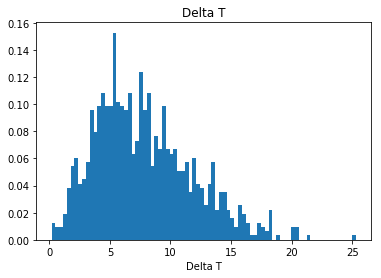

In [9]:
dTau = fundTau(J)
# where J is 10000 as defined above

deltaT = fundeltaT(n_bins, M, dTau)

Tturb, time = funTturb(deltaT)

### Ensure deltaT is an integer multiple of dTau

In [14]:
multiple = []
for i in range(len(deltaT)):
    multiple.append(deltaT[i]/dTau)

print("DeltaT / dTau = \n \n", multiple)

DeltaT / dTau = 
 
 [55.0, 86.0, 96.0, 34.0, 140.99999999999997, 182.0, 290.0, 213.0, 128.0, 121.0, 124.99999999999999, 70.99999999999999, 82.99999999999999, 75.0, 123.0, 144.0, 197.0, 208.0, 162.0, 177.0, 140.99999999999997, 80.99999999999999, 107.0, 112.0, 155.99999999999997, 238.0, 91.0, 45.0, 91.0, 166.0, 155.99999999999997, 160.99999999999997, 99.99999999999999, 64.0, 323.0, 145.0, 94.99999999999999, 42.0, 118.0, 168.0, 7.0, 254.0, 235.0, 89.0, 77.99999999999999, 114.0, 46.00000000000001, 82.0, 86.0, 159.0, 167.0, 183.0, 89.0, 155.0, 65.99999999999999, 104.0, 56.0, 121.0, 94.0, 153.0, 139.0, 179.0, 124.0, 183.0, 129.0, 164.0, 94.99999999999999, 167.0, 56.0, 118.0, 162.0, 199.0, 183.0, 84.0, 91.0, 212.0, 28.0, 255.0, 87.0, 87.0, 145.99999999999997, 69.0, 130.0, 214.0, 176.0, 70.99999999999999, 204.0, 128.0, 121.0, 51.00000000000001, 56.0, 80.99999999999999, 116.0, 89.0, 174.0, 114.99999999999999, 95.0, 126.0, 62.00000000000001, 75.0, 253.0, 72.99999999999999, 209.99999999999997, 15